<a href="https://colab.research.google.com/github/Yussuph02/DS_Webinar/blob/main/Unsupervised%20Learning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

from time import time

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)
from matplotlib import offsetbox

from sklearn.manifold import MDS, TSNE

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style='whitegrid', palette='muted',
        rc={'figure.figsize': (10,8)})

import warnings
warnings.filterwarnings('ignore')

In [65]:
card_df = pd.read_csv('https://raw.githubusercontent.com/Yussuph02/Credit-Card-fraud-detection/refs/heads/main/cc_info.csv')

In [66]:
trans_df = pd.read_csv('https://raw.githubusercontent.com/Yussuph02/Credit-Card-fraud-detection/refs/heads/main/transactions.csv')

In [67]:
card_df

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
...,...,...,...,...,...
979,8938296722055540,Houston,PA,15342,36000
980,2756688131944353,Washington,NH,3280,15000
981,5783648852115715,Washington,NH,3280,20000
982,8259854075192493,Omaha,GA,31821,10000


In [68]:
trans_df

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162


In [104]:
merge_df = pd.merge(trans_df, card_df, on='credit_card', how='inner')

In [105]:
merge_df

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000
...,...,...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,Louisville,GA,30434,6000
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,Louisville,GA,30434,6000
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,Louisville,GA,30434,6000
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,Louisville,GA,30434,6000


In [102]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
 5   city                       294588 non-null  object 
 6   state                      294588 non-null  object 
 7   zipcode                    294588 non-null  int64  
 8   credit_card_limit          294588 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 20.2+ MB


In [103]:
merge_df.describe()

,credit_card,transaction_dollar_amount,Long,Lat,zipcode,credit_card_limit
count,2.945880e+05,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669,18073.772516,15502.053716
std,2.555803e+15,124.655954,20.135015,5.391695,23945.510551,7956.291556
min,1.003715e+15,0.010000,-179.392887,-68.046553,690.000000,2000.000000
25%,3.344214e+15,29.970000,-80.209708,40.487726,3280.000000,10000.000000
50%,5.353426e+15,58.470000,-73.199737,42.403066,5820.000000,15000.000000
75%,7.646245e+15,100.400000,-72.091933,43.180015,18612.000000,20000.000000
max,9.999757e+15,999.970000,179.917513,78.914330,98401.000000,55000.000000


In [108]:
new_df = merge_df.drop(['credit_card','date','zipcode'],axis = 1)

In [109]:
new_df

,transaction_dollar_amount,Long,Lat,city,state,credit_card_limit
0,43.78,-80.174132,40.267370,Houston,PA,20000
1,103.15,-80.194240,40.180114,Houston,PA,20000
2,48.55,-80.211033,40.313004,Houston,PA,20000
3,136.18,-80.174138,40.290895,Houston,PA,20000
4,71.82,-80.238720,40.166719,Houston,PA,20000
...,...,...,...,...,...,...
294583,127.23,-82.360952,32.978497,Louisville,GA,6000
294584,84.90,-82.322721,33.061071,Louisville,GA,6000
294585,77.54,-82.442130,32.949983,Louisville,GA,6000
294586,144.05,-82.398587,32.976162,Louisville,GA,6000


In [110]:
#Encode some of the categorical features
new2_df = pd.get_dummies(new_df,drop_first=True)

In [111]:
new2_df

,transaction_dollar_amount,Long,Lat,credit_card_limit,city_Albany,city_Alexandria,city_Amarillo,city_Arlington,city_Atlanta,city_Auburn,...,state_OK,state_PA,state_PR,state_RI,state_TX,state_UT,state_VA,state_VT,state_WA,state_WV
0,43.78,-80.174132,40.267370,20000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,103.15,-80.194240,40.180114,20000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,48.55,-80.211033,40.313004,20000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,136.18,-80.174138,40.290895,20000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,71.82,-80.238720,40.166719,20000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294583,127.23,-82.360952,32.978497,6000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
294584,84.90,-82.322721,33.061071,6000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
294585,77.54,-82.442130,32.949983,6000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
294586,144.05,-82.398587,32.976162,6000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
#To Reduce variable by variance, we need to instantiate PCA, then fit_transform the data., We will be getting an array of numbers
# be sure to scale the data before fit_transform

In [113]:
pca = PCA()

In [114]:
scaler = StandardScaler()
arr_scaled = scaler.fit_transform(new2_df)

In [115]:
pca_arr = pca.fit_transform(arr_scaled)
pca_arr

array([[-1.29327072e+00,  1.23674887e+00,  7.53146130e-01, ...,
         9.03676182e-16,  3.63288239e-15,  4.08270364e-15],
       [-1.30615018e+00,  1.23706218e+00,  7.71996569e-01, ...,
         1.05633185e-15,  3.63288239e-15,  4.13821479e-15],
       [-1.29157599e+00,  1.24032128e+00,  7.52768943e-01, ...,
         9.03676182e-16,  3.63288239e-15,  4.05494807e-15],
       ...,
       [-2.45210849e+00, -2.72122319e+00,  1.20065922e+00, ...,
         8.34287243e-16,  2.34918701e-15, -1.08388276e-16],
       [-2.45849808e+00, -2.71255360e+00,  1.22022722e+00, ...,
         9.59187333e-16,  2.34918701e-15, -1.08388276e-16],
       [-2.45425681e+00, -2.70528442e+00,  1.22128582e+00, ...,
         9.50205610e-16,  2.32723126e-15, -1.82132505e-16]])

In [81]:
#putting the transformed data into a dataframe for visualization

In [116]:
pca_df = pd.DataFrame(data = pca_arr)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,-1.293271,1.236749,0.753146,2.904760,-0.609278,-0.150118,-0.708725,0.358247,0.000837,-0.063225,...,-4.164086e-16,-9.106128e-15,-2.495145e-15,3.666441e-15,-8.315440e-15,1.154536e-16,-3.066205e-16,9.036762e-16,3.632882e-15,4.082704e-15
1,-1.306150,1.237062,0.771997,2.880029,-0.616182,-0.169039,-0.738539,0.368693,-0.003032,-0.062179,...,-4.025308e-16,-8.884083e-15,-2.509023e-15,3.666441e-15,-8.148906e-15,4.431309e-18,-2.372316e-16,1.056332e-15,3.632882e-15,4.138215e-15
2,-1.291576,1.240321,0.752769,2.902524,-0.609957,-0.151845,-0.711156,0.359045,0.000532,-0.063105,...,-4.164086e-16,-9.106128e-15,-2.495145e-15,3.666441e-15,-8.315440e-15,1.154536e-16,-3.066205e-16,9.036762e-16,3.632882e-15,4.054948e-15
3,-1.303561,1.247943,0.779447,2.865479,-0.620071,-0.180068,-0.755204,0.374293,-0.005171,-0.061469,...,-4.164086e-16,-8.884083e-15,-2.495145e-15,3.610930e-15,-8.093395e-15,-2.332427e-17,-2.233538e-16,1.084087e-15,3.632882e-15,4.082704e-15
4,-1.303462,1.232912,0.762337,2.893386,-0.612624,-0.158907,-0.722786,0.363287,-0.000994,-0.062785,...,-4.025308e-16,-8.939594e-15,-2.509023e-15,3.694197e-15,-8.204417e-15,3.218688e-17,-2.649872e-16,1.000821e-15,3.632882e-15,4.138215e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294583,-2.455827,-2.714154,1.216021,-0.922265,-0.115663,-1.732859,-1.669960,0.360604,-2.273966,1.495134,...,5.723838e-16,9.323574e-15,1.392371e-15,-1.190784e-15,-1.223890e-15,-3.272461e-15,2.737819e-15,9.175540e-16,2.349187e-15,-1.222661e-16
294584,-2.445182,-2.713014,1.202580,-0.904738,-0.110698,-1.719414,-1.648709,0.353116,-2.271206,1.494407,...,5.723838e-16,9.157041e-15,1.406248e-15,-1.163029e-15,-1.334912e-15,-3.189195e-15,2.682308e-15,7.926539e-16,2.349187e-15,-1.638994e-16
294585,-2.452108,-2.721223,1.200659,-0.901040,-0.110039,-1.716773,-1.644974,0.352045,-2.270734,1.494165,...,5.862616e-16,9.268063e-15,1.378493e-15,-1.135273e-15,-1.334912e-15,-3.216950e-15,2.682308e-15,8.342872e-16,2.349187e-15,-1.083883e-16
294586,-2.458498,-2.712554,1.220227,-0.929372,-0.117712,-1.738322,-1.678426,0.363557,-2.275059,1.495443,...,5.723838e-16,9.323574e-15,1.392371e-15,-1.190784e-15,-1.223890e-15,-3.300217e-15,2.737819e-15,9.591873e-16,2.349187e-15,-1.083883e-16


In [117]:
pca_df['state'] = merge_df['state']
pca_df

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,state
0,-1.293271,1.236749,0.753146,2.904760,-0.609278,-0.150118,-0.708725,0.358247,0.000837,-0.063225,...,-9.106128e-15,-2.495145e-15,3.666441e-15,-8.315440e-15,1.154536e-16,-3.066205e-16,9.036762e-16,3.632882e-15,4.082704e-15,PA
1,-1.306150,1.237062,0.771997,2.880029,-0.616182,-0.169039,-0.738539,0.368693,-0.003032,-0.062179,...,-8.884083e-15,-2.509023e-15,3.666441e-15,-8.148906e-15,4.431309e-18,-2.372316e-16,1.056332e-15,3.632882e-15,4.138215e-15,PA
2,-1.291576,1.240321,0.752769,2.902524,-0.609957,-0.151845,-0.711156,0.359045,0.000532,-0.063105,...,-9.106128e-15,-2.495145e-15,3.666441e-15,-8.315440e-15,1.154536e-16,-3.066205e-16,9.036762e-16,3.632882e-15,4.054948e-15,PA
3,-1.303561,1.247943,0.779447,2.865479,-0.620071,-0.180068,-0.755204,0.374293,-0.005171,-0.061469,...,-8.884083e-15,-2.495145e-15,3.610930e-15,-8.093395e-15,-2.332427e-17,-2.233538e-16,1.084087e-15,3.632882e-15,4.082704e-15,PA
4,-1.303462,1.232912,0.762337,2.893386,-0.612624,-0.158907,-0.722786,0.363287,-0.000994,-0.062785,...,-8.939594e-15,-2.509023e-15,3.694197e-15,-8.204417e-15,3.218688e-17,-2.649872e-16,1.000821e-15,3.632882e-15,4.138215e-15,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294583,-2.455827,-2.714154,1.216021,-0.922265,-0.115663,-1.732859,-1.669960,0.360604,-2.273966,1.495134,...,9.323574e-15,1.392371e-15,-1.190784e-15,-1.223890e-15,-3.272461e-15,2.737819e-15,9.175540e-16,2.349187e-15,-1.222661e-16,GA
294584,-2.445182,-2.713014,1.202580,-0.904738,-0.110698,-1.719414,-1.648709,0.353116,-2.271206,1.494407,...,9.157041e-15,1.406248e-15,-1.163029e-15,-1.334912e-15,-3.189195e-15,2.682308e-15,7.926539e-16,2.349187e-15,-1.638994e-16,GA
294585,-2.452108,-2.721223,1.200659,-0.901040,-0.110039,-1.716773,-1.644974,0.352045,-2.270734,1.494165,...,9.268063e-15,1.378493e-15,-1.135273e-15,-1.334912e-15,-3.216950e-15,2.682308e-15,8.342872e-16,2.349187e-15,-1.083883e-16,GA
294586,-2.458498,-2.712554,1.220227,-0.929372,-0.117712,-1.738322,-1.678426,0.363557,-2.275059,1.495443,...,9.323574e-15,1.392371e-15,-1.190784e-15,-1.223890e-15,-3.300217e-15,2.737819e-15,9.591873e-16,2.349187e-15,-1.083883e-16,GA


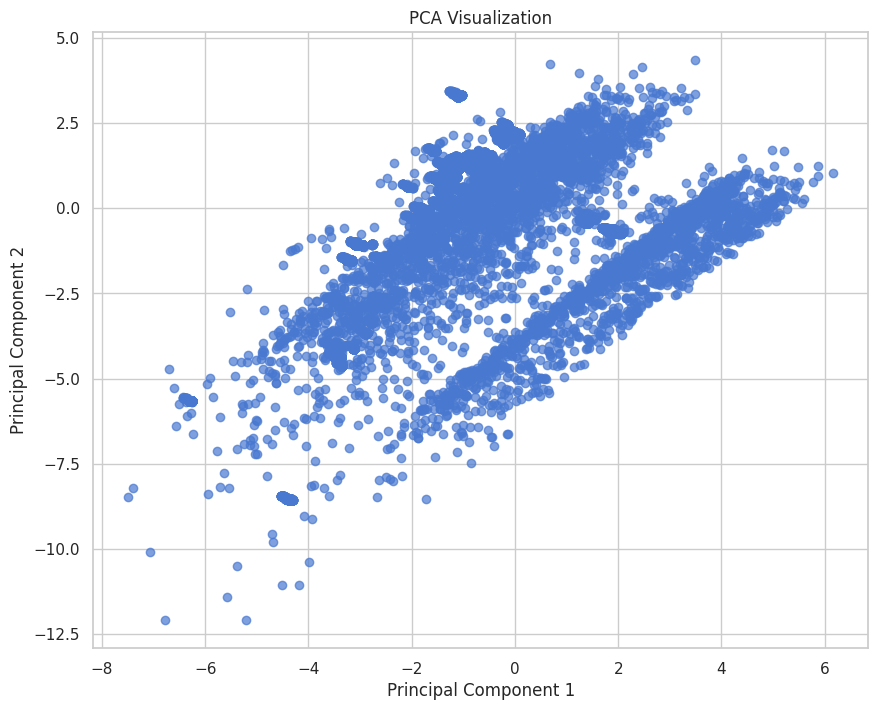

In [118]:
#PCA Visualization
#Plot the PCA-transformed data

plt.scatter(pca_arr[:, 0], pca_arr[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()


In [84]:
#Using explained variance will give an array of numbers in descending variance of each features

In [119]:
explained_arr = pca.explained_variance_
explained_arr

array([3.08600216e+00, 2.40748298e+00, 2.32813972e+00, 2.20525054e+00,
       2.09634493e+00, 2.07998726e+00, 2.07363462e+00, 2.04680511e+00,
       2.03695875e+00, 2.02864645e+00, 2.02320695e+00, 2.02167423e+00,
       2.01999858e+00, 2.01958957e+00, 2.01876126e+00, 2.01614952e+00,
       2.01452720e+00, 2.01310587e+00, 2.01258077e+00, 2.00996726e+00,
       2.00951947e+00, 2.00898033e+00, 2.00751789e+00, 2.00647882e+00,
       2.00597975e+00, 2.00568486e+00, 2.00493096e+00, 2.00451356e+00,
       2.00443682e+00, 2.00419262e+00, 2.00395926e+00, 2.00373740e+00,
       2.00046800e+00, 1.37699202e+00, 1.05691228e+00, 1.04599051e+00,
       1.03564499e+00, 1.03031252e+00, 1.02434193e+00, 1.02091708e+00,
       1.01551616e+00, 1.01436667e+00, 1.01377659e+00, 1.00995443e+00,
       1.00945507e+00, 1.00906192e+00, 1.00852305e+00, 1.00787812e+00,
       1.00754050e+00, 1.00692726e+00, 1.00600685e+00, 1.00595799e+00,
       1.00574292e+00, 1.00533161e+00, 1.00493296e+00, 1.00436560e+00,
      

In [86]:
#Plot cummulative sum for the explained array to get the visual representation of the explained array, of number of featured variances

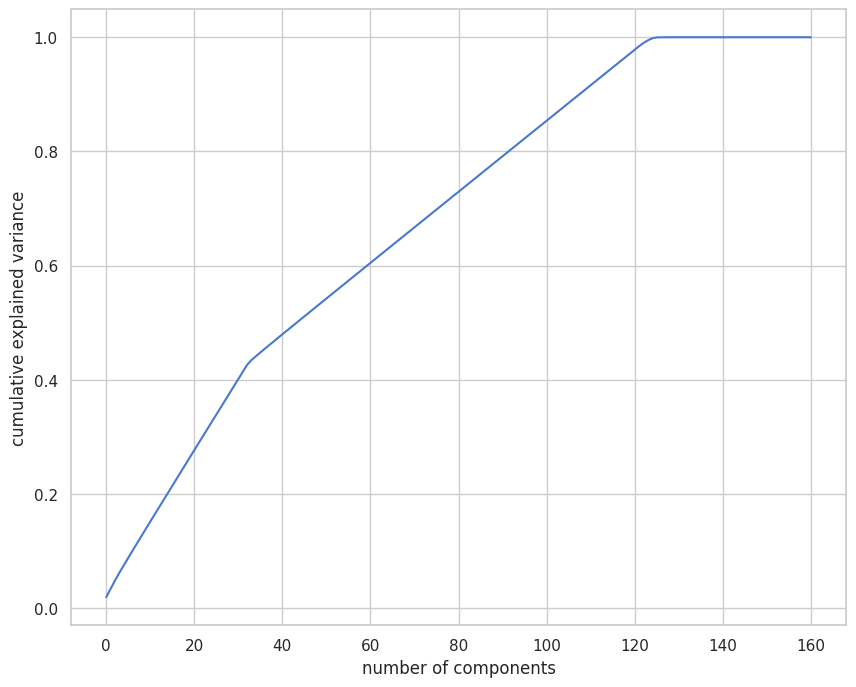

In [124]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [125]:
#This visual is implying that with 90 components, 80% of the data is explained,
#with 130 components, 100% of the data is explained, so there is no reason to use the whole 161 feature components

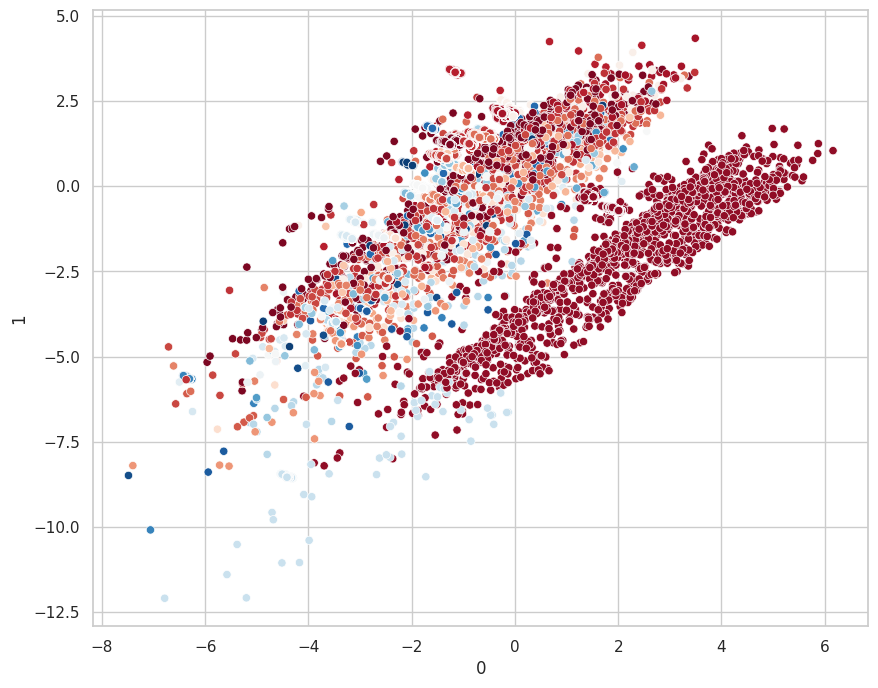

In [127]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
                     hue="state",
 palette='RdBu',
                     data=pca_df,
                     legend=False)
plt.show()

In [128]:
#Multidimensional Scaling (MDS)
#MDS is a dimensionality reduction technique used to visualize similarities or
#dissimilarities between data points in a lower-dimensional space (typically 2D or 3D).
#It is useful when you have distance or dissimilarity matrices instead of direct feature vectors.

In [129]:
# Step 1: Load Data
iris = load_iris()
X = iris.data
y = iris.target

In [130]:
# Step 2: Standardize Data (Optional, but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [131]:
# Step 3: Apply MDS
mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean")  # Dissimilarity = Euclidean Distance
X_mds = mds.fit_transform(X_scaled)

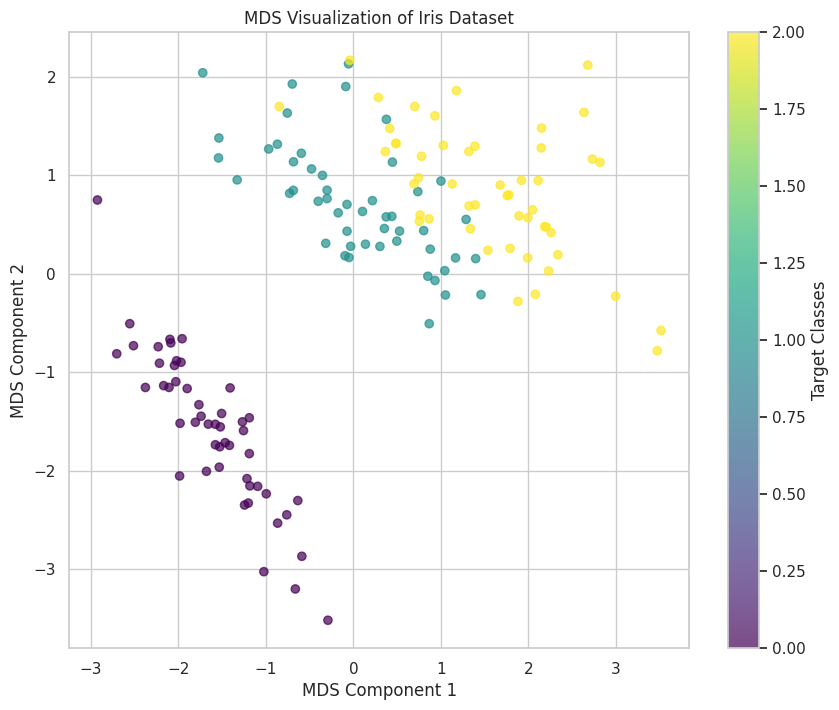

In [132]:
# Step 4: Plot the Results
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=iris.target, cmap='viridis', alpha=0.7)
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("MDS Visualization of Iris Dataset")
plt.colorbar(label="Target Classes")
plt.show()

In [133]:
#T-SNE
#t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear
#dimensionality reduction technique for data exploration and visualizing high-dimensional data.

In [134]:
# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


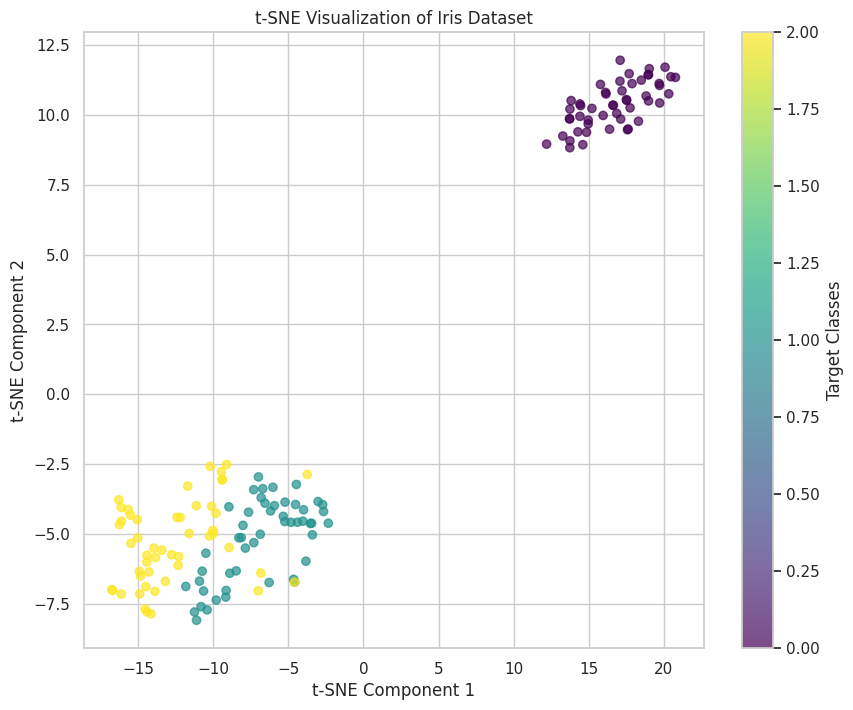

In [135]:
# Step 4: Visualize Results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Iris Dataset")
plt.colorbar(label="Target Classes")
plt.show()